In [1]:
import gzip
import csv
import pandas as pd

# Check if dataset exists. If not, download and extract  it
nli_dataset_path = "data/AllNLI.tsv.gz"

data = []

with gzip.open(nli_dataset_path, "rt", encoding="utf8") as fIn:
    reader = csv.DictReader(fIn, delimiter="\t", quoting=csv.QUOTE_NONE)
    for row in reader:
        data.append(row)

df = pd.DataFrame(data)

In [24]:
df_bunka = df[df['split']=='test']
df_bunka_entail = df_bunka[df_bunka['label']=='entailment']
docs = list(set(df_bunka_entail['sentence1']))

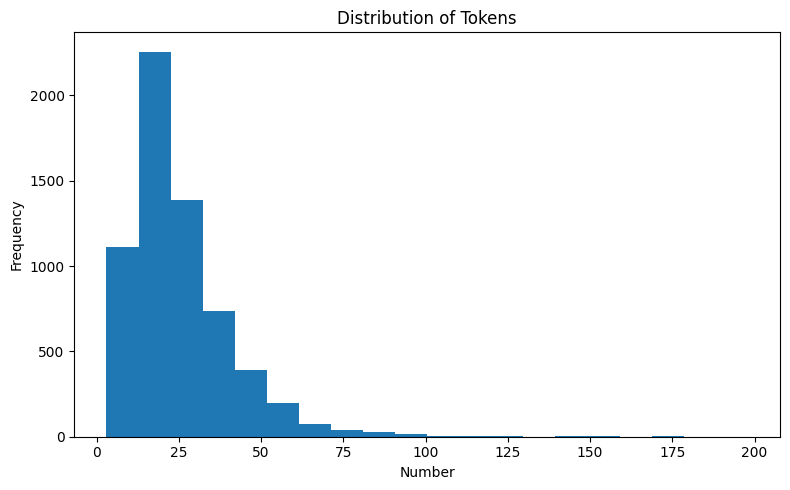

In [3]:
import matplotlib.pyplot as plt


len_docs = [len(doc.split(' ')) for doc in docs]
len_docs = [int(x*1.5) for x in len_docs]

# Creating the histogram for the given numbers
plt.figure(figsize=(8, 5))
plt.hist(len_docs, bins=20)
plt.title('Distribution of Tokens')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [12]:
from bunkatopics import Bunka
from langchain_community.embeddings import HuggingFaceEmbeddings

# Choose your embedding model

model_name = "nomic-ai/nomic-embed-text-v1"
#model_name = "all-MiniLM-L6-v2"
embedding_model = HuggingFaceEmbeddings(model_name=model_name,# We recommend starting with a small model
                                        model_kwargs={"device": "cuda", "trust_remote_code":True}, # Or cuda if you have GPU
                                        #encode_kwargs={"show_progress_bar": True}, # Show the progress of embeddings
                                        multi_process=False
                                        )  # set to True if you have mutliprocessing


You try to use a model that was created with version 2.4.0.dev0, however, your version is 2.4.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.



<All keys matched successfully>


In [13]:
# Initialize Bunka with your chosen model and language preference
bunka = Bunka(embedding_model=embedding_model, language='english') # You can choose any language you prefer

# Fit Bunka to your list of text
bunka.fit(docs)

2024-02-26 12:56:44 - Bunka - INFO - Embedding documents... (can take varying amounts of time depending on their size)
2024-02-26 12:56:59 - Bunka - INFO - Reducing the dimensions of embeddings...
2024-02-26 12:57:24 - Bunka - INFO - Extracting meaningful terms from documents...
100%|██████████| 6257/6257 [00:51<00:00, 120.53it/s]


In [18]:
from sklearn.cluster import KMeans

clustering_method = KMeans(n_clusters=10, random_state=42)

bunka.get_topics(n_clusters=25, 
                    name_length=10, 
                    min_count_terms = 30, 
                    top_terms_overall = 1000000,
                    max_doc_per_topic = 2000,
                    min_docs_per_cluster = 1000,
                    ranking_terms = 15,
                    ngrams = [1,2],
                    custom_clustering_model = clustering_method
                    ) # Specify the number of terms to describe each topic


2024-02-26 12:59:43 - Bunka - INFO - Computing the topics


topic_id                                         topic_name  size  percent
0     bt-9  woman | women | people | group | table | lady ...   911    14.56
1     bt-0  man | men | shirt | guitar | suit | building |...   849    13.57
2     bt-5  support | year | students | gift | children | ...   826    13.20
3     bt-1  stories | story | lot | school | mother | time...   760    12.15
4     bt-2  aircraft | flight | information | air | order ...   627    10.02
5     bt-6  boy | girl | girls | child | boys | children |...   614     9.81
6     bt-3  player | ball | person | helmet | bike | socce...   590     9.43
7     bt-8  words | language | word | use | book | world |...   504     8.05
8     bt-4  apparel | production | inventory | demand | re...   399     6.38
9     bt-7  dog | dogs | mouth | grass | ball | tennis | s...   177     2.83

In [19]:
bunka.visualize_topics(width=800, height=800)

2024-02-26 12:59:48 - Bunka - INFO - Creating the Bunka Map


## Contradiction data

In [25]:
df_bunka = df[df['split']=='test']
df_bunka_cont = df_bunka[df_bunka['label']=='contradiction']
docs_cont = list(set(df_bunka_cont['sentence1']))
print(len(docs_cont))

In [29]:
from bunkatopics import Bunka

# Initialize Bunka with your chosen model and language preference
bunka_cont = Bunka(embedding_model=embedding_model, language='english') # You can choose any language you prefer

# Fit Bunka to your list of text
bunka_cont.fit(docs_cont)

2024-02-26 13:02:58 - Bunka - INFO - Embedding documents... (can take varying amounts of time depending on their size)
2024-02-26 13:03:12 - Bunka - INFO - Reducing the dimensions of embeddings...
2024-02-26 13:03:19 - Bunka - INFO - Extracting meaningful terms from documents...
100%|██████████| 6276/6276 [00:48<00:00, 128.89it/s]


In [30]:
bunka_cont.get_topics(n_clusters=25, 
                    name_length=10, 
                    min_count_terms = 30, 
                    top_terms_overall = 1000000,
                    max_doc_per_topic = 2000,
                    min_docs_per_cluster = 1000,
                    ranking_terms = 15,
                    ngrams = [1,2],
                    custom_clustering_model = clustering_method
                    ) # Specify the number of terms to describe each topic

bunka_cont.visualize_topics(width=800, height=800)

2024-02-26 13:04:21 - Bunka - INFO - Computing the topics
2024-02-26 13:04:24 - Bunka - INFO - Creating the Bunka Map
